In [1]:
#install packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import normalize


In [2]:
#Load the data
LoanPayDF = pd.read_csv("CustomerReturns (1).csv")

In [3]:
#check the loaded data
LoanPayDF.head()

,Gender,Education,Race,Home_ownership,Age,Tenure,Num_purchase,Lifetime_purchase,Ave_price,num_of_returns,Amt_returned,return_loss
0,1,0,0,0,44,52,21,18590,885,8,7082,1416
1,1,0,0,0,20,8,15,17184,1146,8,9165,1833
2,0,1,0,0,45,6,13,15024,1156,8,9246,1849
3,0,1,1,0,35,3,5,5822,1164,8,9316,1863
4,1,0,1,0,24,12,18,27480,1527,8,12213,2443


In [4]:
#confirm the data types 
LoanPayDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             97 non-null     int64
 1   Education          97 non-null     int64
 2   Race               97 non-null     int64
 3   Home_ownership     97 non-null     int64
 4   Age                97 non-null     int64
 5   Tenure             97 non-null     int64
 6   Num_purchase       97 non-null     int64
 7   Lifetime_purchase  97 non-null     int64
 8   Ave_price          97 non-null     int64
 9   num_of_returns     97 non-null     int64
 10  Amt_returned       97 non-null     int64
 11  return_loss        97 non-null     int64
dtypes: int64(12)
memory usage: 9.2 KB


In [5]:
#check whether the data has NA
LoanPayDF.isnull().sum()

Gender               0
Education            0
Race                 0
Home_ownership       0
Age                  0
Tenure               0
Num_purchase         0
Lifetime_purchase    0
Ave_price            0
num_of_returns       0
Amt_returned         0
return_loss          0
dtype: int64

In [6]:
#Remove Null values (NA)
LoanPayDF.dropna(inplace = True)

/var/folders/37/9ntfvc_x2nq7277sdc749w_c0000gn/T/ipykernel_21169/2606435310.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


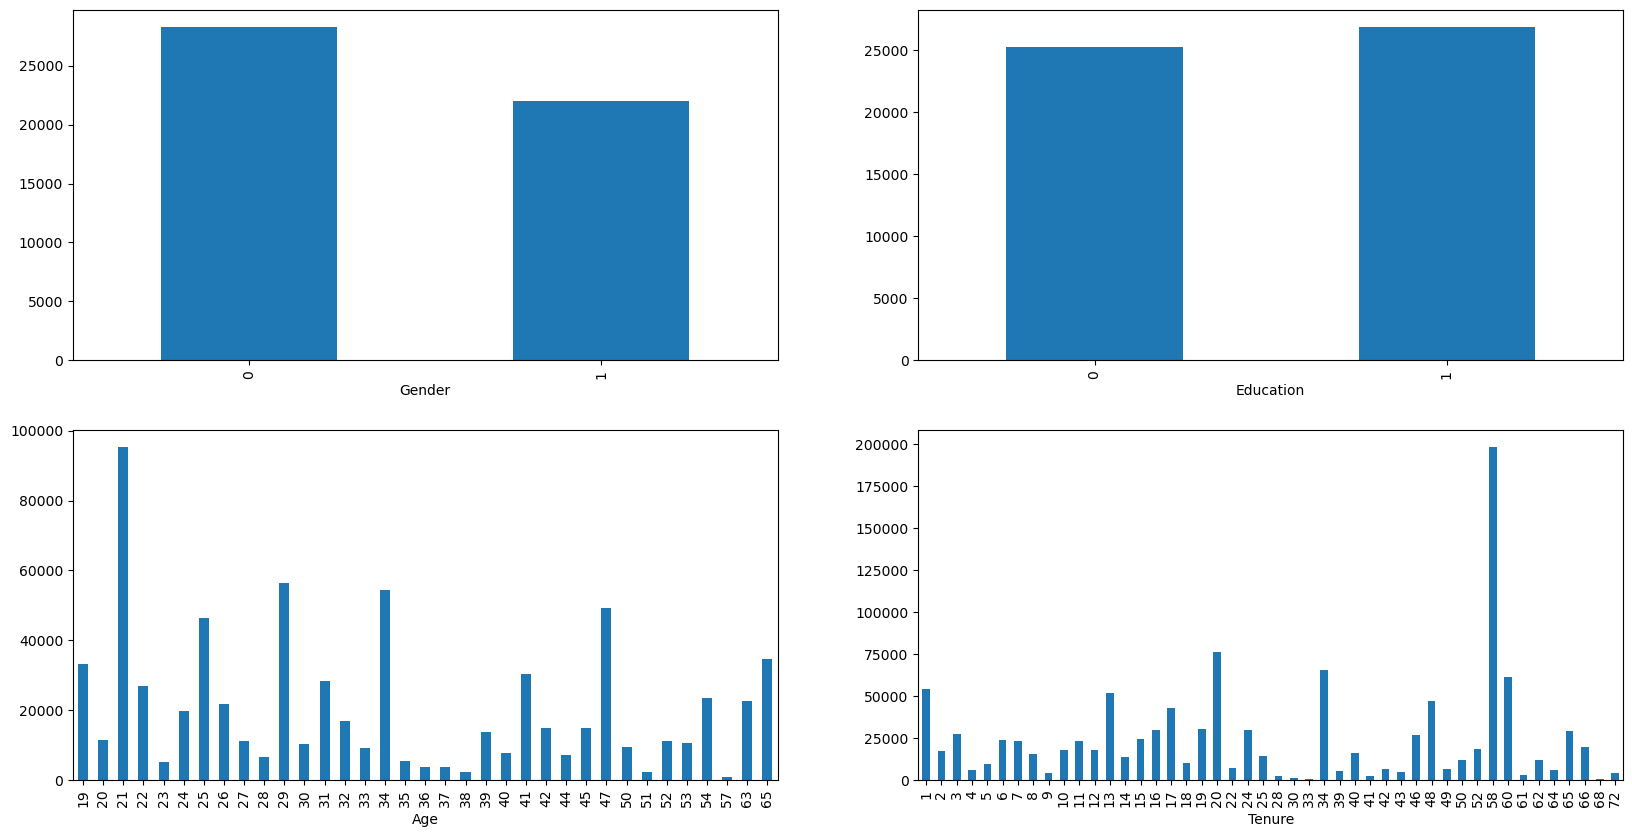

In [7]:
#Analyze and plot some of the variables
features = ['Gender', 'Education', 'Age', 'Tenure']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    LoanPayDF.groupby(col).mean()['Lifetime_purchase'].plot.bar()
plt.show()

/var/folders/37/9ntfvc_x2nq7277sdc749w_c0000gn/T/ipykernel_21169/3242883752.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


ValueError: num must be an integer with 1 <= num <= 4, not 5

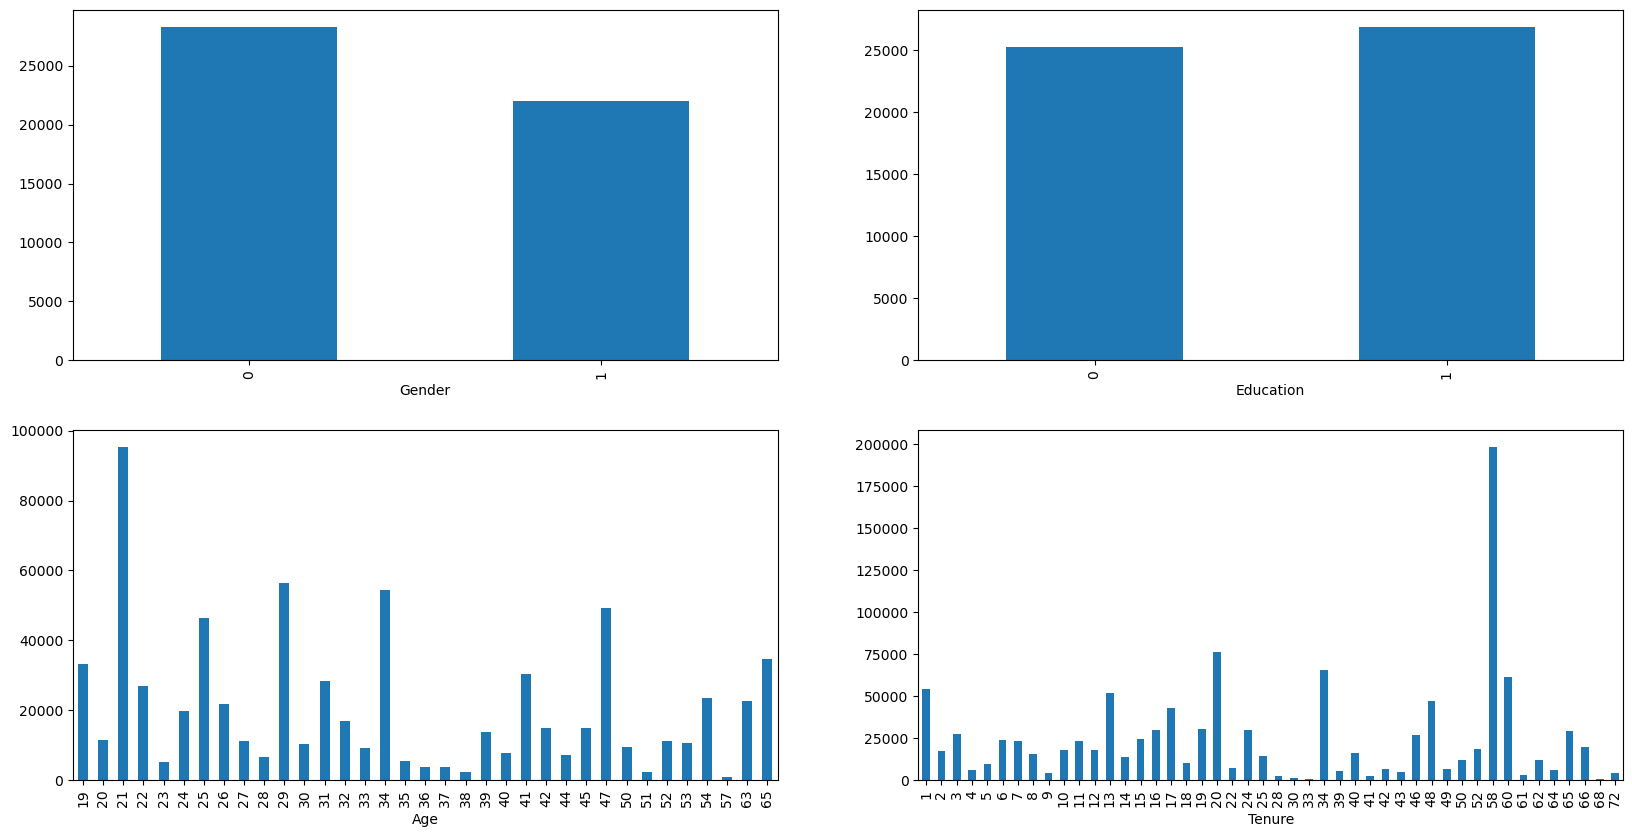

In [8]:
#Analyze and plot some of the variables
features = ['Gender', 'Education', 'Age', 'Tenure', 'Num_purchase', 'Ave_price', 'num_of_returns', 'Amt_returned', 'return_loss']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    LoanPayDF.groupby(col).mean()['Lifetime_purchase'].plot.bar()
plt.show()

In [9]:
LoanPayDF.head()

,Gender,Education,Race,Home_ownership,Age,Tenure,Num_purchase,Lifetime_purchase,Ave_price,num_of_returns,Amt_returned,return_loss
0,1,0,0,0,44,52,21,18590,885,8,7082,1416
1,1,0,0,0,20,8,15,17184,1146,8,9165,1833
2,0,1,0,0,45,6,13,15024,1156,8,9246,1849
3,0,1,1,0,35,3,5,5822,1164,8,9316,1863
4,1,0,1,0,24,12,18,27480,1527,8,12213,2443


In [10]:
#normalize the data
LoanPayDF = pd.DataFrame(normalize (LoanPayDF), columns=LoanPayDF.columns)

In [11]:
LoanPayDF.head()

,Gender,Education,Race,Home_ownership,Age,Tenure,Num_purchase,Lifetime_purchase,Ave_price,num_of_returns,Amt_returned,return_loss
0,0.000050,0.000000,0.000000,0.0,0.002204,0.002605,0.001052,0.931205,0.044331,0.000401,0.354750,0.070930
1,0.000051,0.000000,0.000000,0.0,0.001021,0.000408,0.000766,0.876962,0.058485,0.000408,0.467723,0.093545
2,0.000000,0.000056,0.000000,0.0,0.002532,0.000338,0.000731,0.845211,0.065034,0.000450,0.520156,0.104020
3,0.000000,0.000089,0.000089,0.0,0.003124,0.000268,0.000446,0.519675,0.103899,0.000714,0.831552,0.166293
4,0.000033,0.000000,0.000033,0.0,0.000794,0.000397,0.000596,0.909650,0.050547,0.000265,0.404278,0.080869


In [12]:
#define the x and y variables
x=LoanPayDF.drop('Lifetime_purchase',axis='columns')
y=LoanPayDF['Lifetime_purchase']

In [13]:
#split the data into train and test dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [14]:
#build the model sklearn
LoanPaymod = LinearRegression()
LoanPaymod.fit(x_train, y_train)

LinearRegression()

In [15]:
# create stastical summary.....
model = sm.OLS(y, x).fit()
print (model.summary ())

                                 OLS Regression Results                                
Dep. Variable:      Lifetime_purchase   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.790
Method:                 Least Squares   F-statistic:                              34.19
Date:                Wed, 07 Feb 2024   Prob (F-statistic):                    9.08e-27
Time:                        14:39:22   Log-Likelihood:                         -19.256
No. Observations:                  97   AIC:                                      60.51
Df Residuals:                      86   BIC:                                      88.83
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [16]:
#Analyze and plot some of the variables
features = ['int_rate', 'LoanTerm', 'home_ownership', 'Num_purchase', 'Lifetime_purchase', 'Ave_price']

/var/folders/37/9ntfvc_x2nq7277sdc749w_c0000gn/T/ipykernel_21169/3286298000.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


KeyError: 'int_rate'

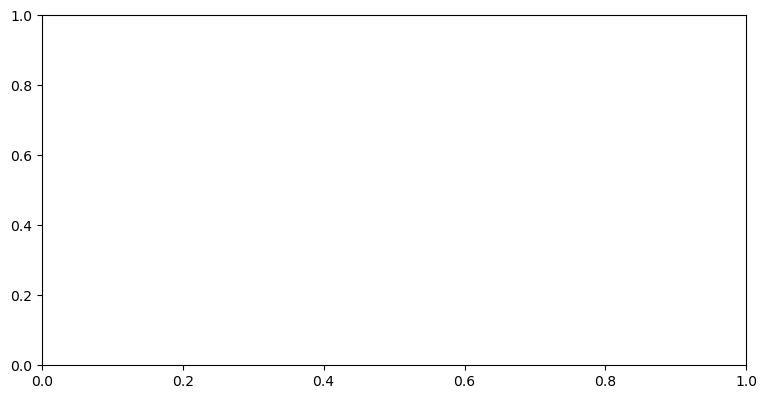

In [17]:
#Analyze and plot some of the variables
features = ['int_rate', 'LoanTerm', 'home_ownership', 'Num_purchase', 'Lifetime_purchase', 'Ave_price']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    LoanPayDF.groupby(col).mean()['Lifetime_purchase'].plot.bar()
plt.show()



In [18]:
#Analyze and plot some of the variables
features = ['Gender', 'Education', 'Age', 'Tenure", 'Home_ownership', 'Num_purchase', 'Lifetime_purchase', 'Ave_price']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    LoanPayDF.groupby(col).mean()['Amt_returned'].plot.bar()
plt.show()

SyntaxError: unterminated string literal (detected at line 2) (3356409828.py, line 2)

In [19]:
#Analyze and plot some of the variables
features = ['Gender', 'Education', 'Age', 'Tenure", 'Home_ownership', 'Num_purchase', 'Lifetime_purchase', 'Ave_price']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    LoanPayDF.groupby(col).mean()['Amt_returned'].plot.bar()
plt.show()

SyntaxError: unterminated string literal (detected at line 2) (3126930742.py, line 2)

/var/folders/37/9ntfvc_x2nq7277sdc749w_c0000gn/T/ipykernel_21169/3228867255.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


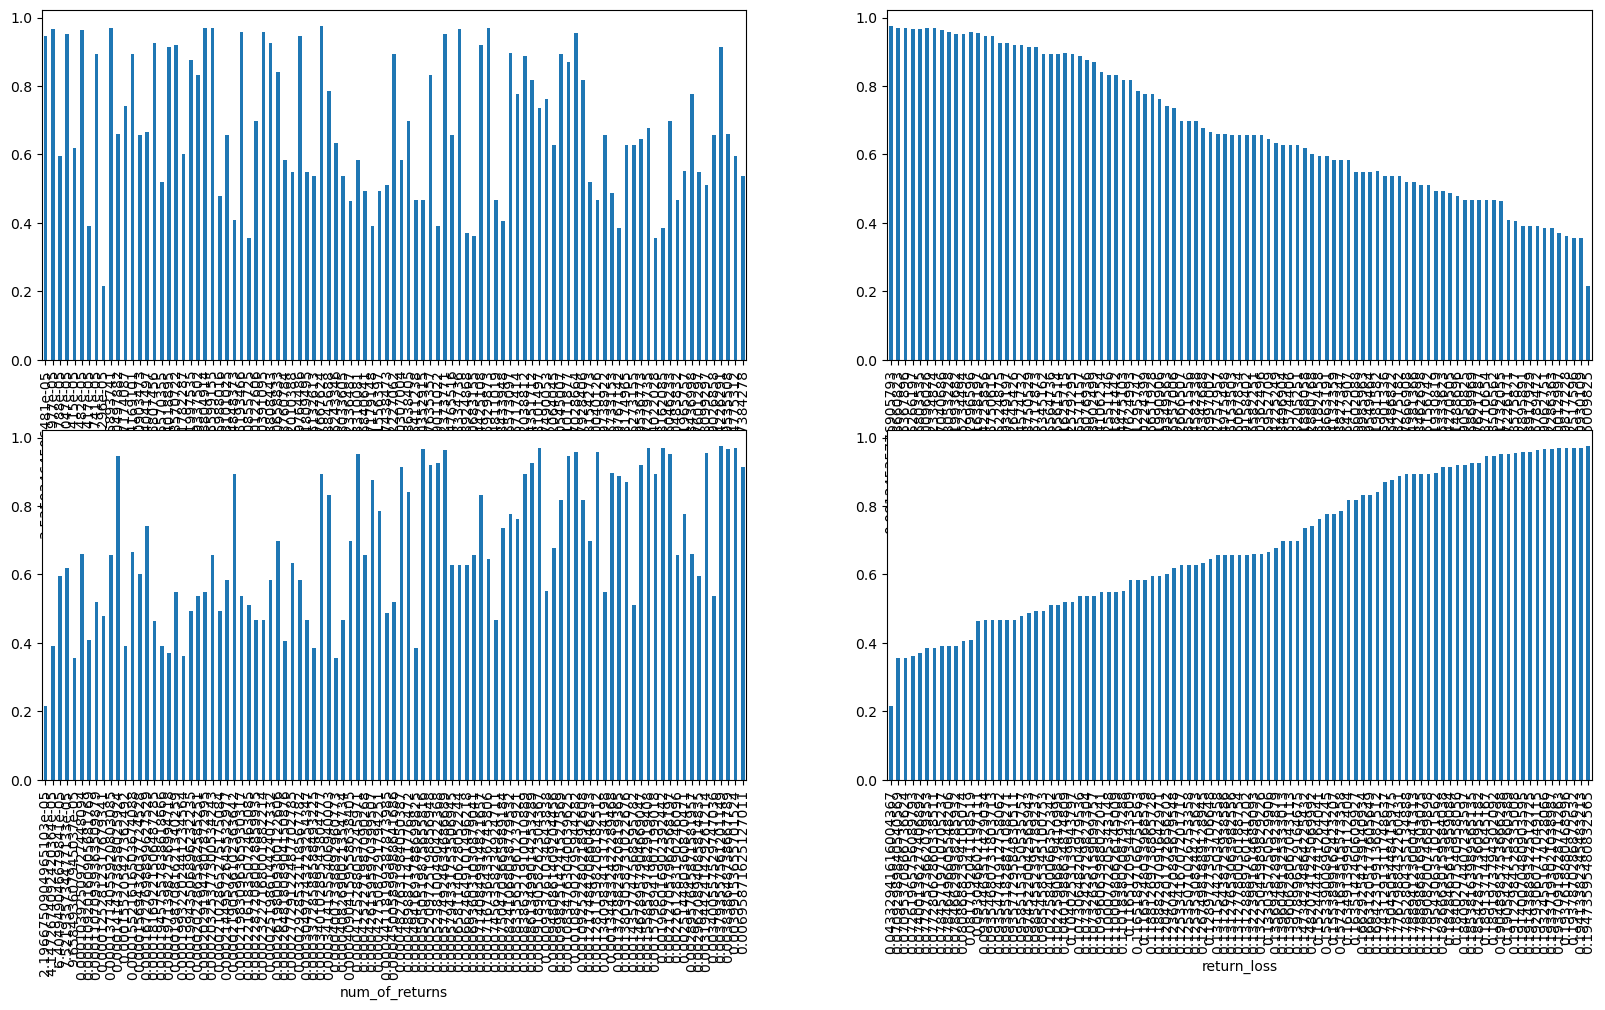

In [20]:
#Analyze and plot some of the variables
features = ['Num_purchase', 'Lifetime_purchase', 'num_of_returns', 'return_loss']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    LoanPayDF.groupby(col).mean()['Amt_returned'].plot.bar()
plt.show()

/var/folders/37/9ntfvc_x2nq7277sdc749w_c0000gn/T/ipykernel_21169/541715513.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i + 1)


NameError: name 'customerReturnsDF' is not defined

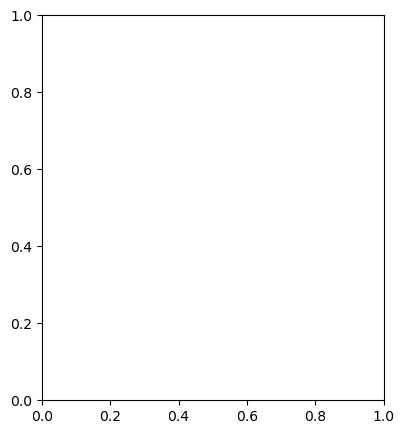

In [21]:
# Analyze and plot some of the variables
features_to_analyze = ['Lifetime_purchase', 'Ave_price', 'return_loss']

plt.subplots(figsize=(15, 5))
for i, col in enumerate(features_to_analyze):
    plt.subplot(1, 3, i + 1)
    plt.scatter(customerReturnsDF[col], customerReturnsDF['Amt_returned'])
    plt.title(f'{col} vs. Amt_returned')
    plt.xlabel(col)
    plt.ylabel('Amt_returned')
plt.tight_layout()
plt.show()

/var/folders/37/9ntfvc_x2nq7277sdc749w_c0000gn/T/ipykernel_21169/1717042884.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


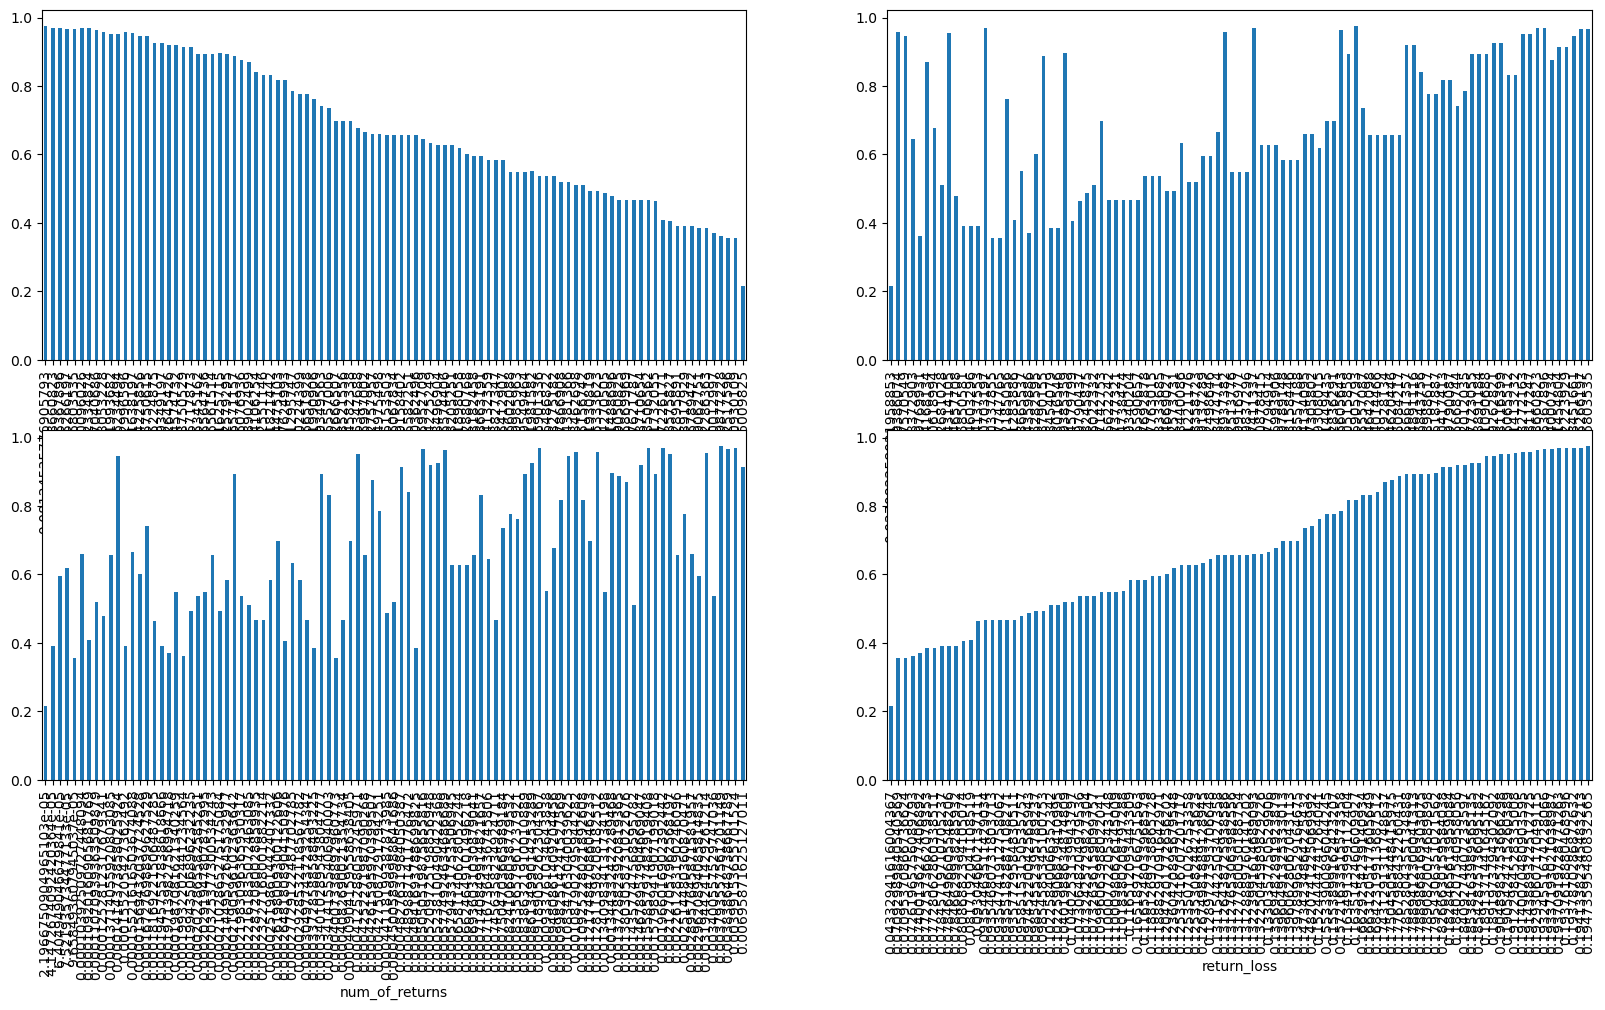

In [22]:
#Analyze and plot some of the variables
features = ['Lifetime_purchase', 'Ave_price', 'num_of_returns', 'return_loss']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    LoanPayDF.groupby(col).mean()['Amt_returned'].plot.bar()
plt.show()

NameError: name 'customerReturnsDF' is not defined

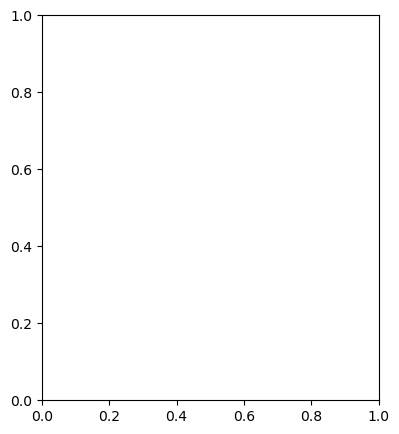

In [23]:
import matplotlib.pyplot as plt

# Independent variables
independent_vars = ['Num_purchase', 'Lifetime_purchase', 'num_of_returns', 'return_loss']

# Dependent variable
dependent_var = 'Amt_returned'

# Plotting
plt.figure(figsize=(20, 5))
for i, var in enumerate(independent_vars):
    plt.subplot(1, 4, i + 1)  # Create subplot for each independent variable
    plt.scatter(customerReturnsDF[var], customerReturnsDF[dependent_var], alpha=0.5)
    plt.title(f'{var} vs. {dependent_var}')
    plt.xlabel(var)
    plt.ylabel(dependent_var)

plt.tight_layout()
plt.show()


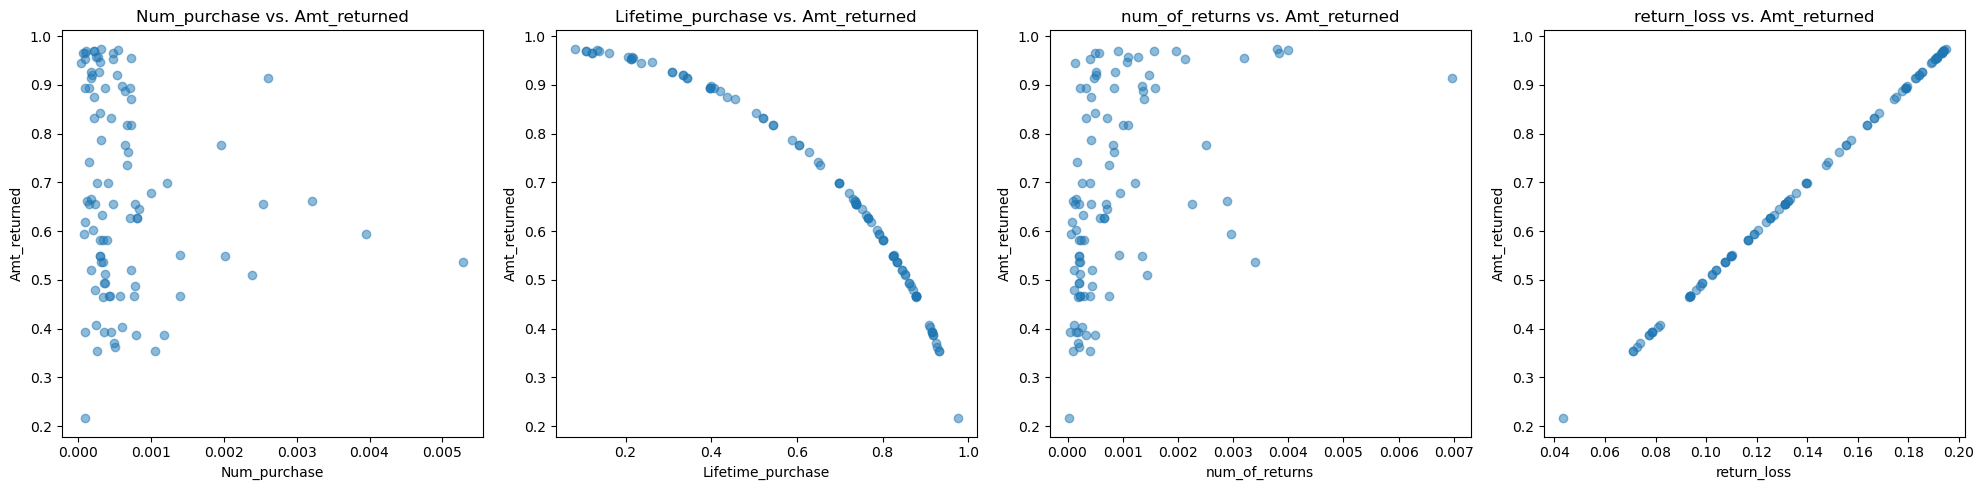

In [24]:
import matplotlib.pyplot as plt

# Independent variables
independent_vars = ['Num_purchase', 'Lifetime_purchase', 'num_of_returns', 'return_loss']

# Dependent variable
dependent_var = 'Amt_returned'

# Plotting
plt.figure(figsize=(20, 5))
for i, var in enumerate(independent_vars):
    plt.subplot(1, 4, i + 1)  # Create subplot for each independent variable
    plt.scatter(LoanPayDF[var], LoanPayDF[dependent_var], alpha=0.5)
    plt.title(f'{var} vs. {dependent_var}')
    plt.xlabel(var)
    plt.ylabel(dependent_var)

plt.tight_layout()
plt.show()
